In [1]:
import os
import math

import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

from numpy import load
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from xgboost import XGBClassifier

from sklearn.impute import KNNImputer

from sklearn.svm import SVC

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

rd_seed = 333

## Načtení dat

In [2]:
path_file = os.sep.join(['created_data', 'matrix_semestr_3.csv'])
matrix_bak = pd.read_csv(path_file, sep=",")

## Info o datasetu

In [3]:
matrix_bak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   studium_id               2049 non-null   int64  
 1   dokoncil_semestr         2049 non-null   float64
 2   BI-PA1_znamka            2049 non-null   float64
 3   BI-PA1_poradi_zapisu     2049 non-null   float64
 4   BI-PAI_znamka            2049 non-null   float64
 5   BI-PAI_poradi_zapisu     2049 non-null   float64
 6   BI-CAO_znamka            2049 non-null   float64
 7   BI-CAO_poradi_zapisu     2049 non-null   float64
 8   BI-PS1_znamka            2049 non-null   float64
 9   BI-PS1_poradi_zapisu     2049 non-null   float64
 10  BI-MLO_znamka            2049 non-null   float64
 11  BI-MLO_poradi_zapisu     2049 non-null   float64
 12  BI-ZMA_znamka            2049 non-null   float64
 13  BI-ZMA_poradi_zapisu     2049 non-null   float64
 14  pocet_kreditu_semestr_1 

In [4]:
matrix_bak.mean()

studium_id                 1.501939e+07
dokoncil_semestr           9.346022e-01
BI-PA1_znamka              2.329429e+00
BI-PA1_poradi_zapisu       8.897023e-01
BI-PAI_znamka              1.955100e+00
BI-PAI_poradi_zapisu       8.584675e-01
BI-CAO_znamka              9.902391e-01
BI-CAO_poradi_zapisu       8.038067e-01
BI-PS1_znamka              2.174231e+00
BI-PS1_poradi_zapisu       9.443631e-01
BI-MLO_znamka              1.980478e+00
BI-MLO_poradi_zapisu       8.457784e-01
BI-ZMA_znamka              2.301611e+00
BI-ZMA_poradi_zapisu       8.867740e-01
pocet_kreditu_semestr_1    2.579063e+01
BI-PA2_znamka              2.364812e+00
BI-PA2_poradi_zapisu       7.764763e-01
BI-DBS_znamka              1.698878e+00
BI-DBS_poradi_zapisu       8.413860e-01
BI-SAP_znamka              1.676428e+00
BI-SAP_poradi_zapisu       8.369937e-01
BI-LIN_znamka              2.891898e+00
BI-LIN_poradi_zapisu       8.955588e-01
pocet_kreditu_semestr_2    2.248316e+01
dtype: float64

In [5]:
matrix_bak['BI-LIN_poradi_zapisu'].value_counts()

 1.0    1942
-1.0     107
Name: BI-LIN_poradi_zapisu, dtype: int64

## Příprava datasetu

### Nastavení indexu

In [6]:
matrix_bak = matrix_bak.set_index(['studium_id'])

### Nastavení atributů na kategorické - ordinální

In [7]:
# ordinální
grades_category = pd.api.types.CategoricalDtype(categories=[-1,1, 1.5, 2, 2.5, 3, 4], ordered=True)
# BI-PA1
matrix_bak['BI-PA1_znamka'] = matrix_bak['BI-PA1_znamka'].astype(grades_category)
# BI-PAI
matrix_bak['BI-PAI_znamka'] = matrix_bak['BI-PAI_znamka'].astype(grades_category)
# BI-CAO
matrix_bak['BI-CAO_znamka'] = matrix_bak['BI-CAO_znamka'].astype(grades_category)
# BI-PS1
matrix_bak['BI-PS1_znamka'] = matrix_bak['BI-PS1_znamka'].astype(grades_category)
# BI-MLO
matrix_bak['BI-MLO_znamka'] = matrix_bak['BI-MLO_znamka'].astype(grades_category)
# BI-ZMA
matrix_bak['BI-ZMA_znamka'] = matrix_bak['BI-ZMA_znamka'].astype(grades_category)
# BI-PA2
matrix_bak['BI-PA2_znamka'] = matrix_bak['BI-PA2_znamka'].astype(grades_category)
# BI-DBS
matrix_bak['BI-DBS_znamka'] = matrix_bak['BI-DBS_znamka'].astype(grades_category)
# BI-SAP
matrix_bak['BI-SAP_znamka'] = matrix_bak['BI-SAP_znamka'].astype(grades_category)
# BI-LIN
matrix_bak['BI-LIN_znamka'] = matrix_bak['BI-LIN_znamka'].astype(grades_category)

In [8]:
matrix_bak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 14267106 to 18639106
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   dokoncil_semestr         2049 non-null   float64 
 1   BI-PA1_znamka            2049 non-null   category
 2   BI-PA1_poradi_zapisu     2049 non-null   float64 
 3   BI-PAI_znamka            2049 non-null   category
 4   BI-PAI_poradi_zapisu     2049 non-null   float64 
 5   BI-CAO_znamka            2049 non-null   category
 6   BI-CAO_poradi_zapisu     2049 non-null   float64 
 7   BI-PS1_znamka            2049 non-null   category
 8   BI-PS1_poradi_zapisu     2049 non-null   float64 
 9   BI-MLO_znamka            2049 non-null   category
 10  BI-MLO_poradi_zapisu     2049 non-null   float64 
 11  BI-ZMA_znamka            2049 non-null   category
 12  BI-ZMA_poradi_zapisu     2049 non-null   float64 
 13  pocet_kreditu_semestr_1  2049 non-null   float64 
 1

## Modelování

### Bakalář všechny pp

#### Rozdělení datasetu

In [9]:
Xdata = matrix_bak.drop(columns='dokoncil_semestr')
ydata = matrix_bak.dokoncil_semestr

In [10]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.2, random_state=rd_seed, stratify=ydata, shuffle=True) 
print("původní data")
display(Xdata.shape)
display(ydata.shape)
print("trénovací data")
display(Xtrain.shape)
display(ytrain.shape)
print("testovací data")
display(Xtest.shape)
display(ytest.shape)

původní data


(2049, 22)

(2049,)

trénovací data


(1639, 22)

(1639,)

testovací data


(410, 22)

(410,)

In [43]:
ytest.value_counts()

1.0    383
0.0     27
Name: dokoncil_semestr, dtype: int64

#### Funkce pro vybrání vhodných hyperparametrů pomocí křížové validace

In [12]:
def get_best_parameters(param_grid, classifier, xgb=None):
    score = 'f1'
    if xgb:
        model = GridSearchCV(classifier(eval_metric='mlogloss', use_label_encoder=False, tree_method="gpu_hist", enable_categorical=True), param_grid, cv=5, scoring=score)
    else:
        model = GridSearchCV(classifier(), param_grid, cv=5, scoring=score)
    model.fit(Xtrain, ytrain)

    print('Best hyper-parameters are: ')
    print(model.best_params_)
    print()

    means = model.cv_results_["mean_test_score"]
    stds = model.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, model.cv_results_["params"]):
        print("%0.6f (+/-%0.06f) for %r" % (mean, std * 2, params))
    print()
    return model

#### Rozhodovací strom

In [13]:
param_grid = [
    {'criterion':['gini','entropy'],
    'max_depth': range(2,7),
    'min_samples_leaf':[10]}
]

In [14]:
dt_f1 = get_best_parameters(param_grid, DecisionTreeClassifier)

Best hyper-parameters are: 
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}

0.966256 (+/-0.001564) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}
0.966256 (+/-0.001564) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
0.963246 (+/-0.008763) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 10}
0.958938 (+/-0.013561) for {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}
0.958184 (+/-0.016102) for {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10}
0.966256 (+/-0.001564) for {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 10}
0.966256 (+/-0.001564) for {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 10}
0.966256 (+/-0.001564) for {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 10}
0.965886 (+/-0.003301) for {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}
0.964877 (+/-0.005650) for {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10}



In [15]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, dt_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, dt_f1.predict(Xtest))))

accuracy score (train): 0.934716
accuracy score (test): 0.934146


In [16]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':dt_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
12,pocet_kreditu_semestr_1,0.819098
10,BI-ZMA_znamka,0.180902
0,BI-PA1_znamka,0.000000
20,BI-LIN_poradi_zapisu,0.000000
19,BI-LIN_znamka,0.000000
18,BI-SAP_poradi_zapisu,0.000000
17,BI-SAP_znamka,0.000000
16,BI-DBS_poradi_zapisu,0.000000
15,BI-DBS_znamka,0.000000
14,BI-PA2_poradi_zapisu,0.000000


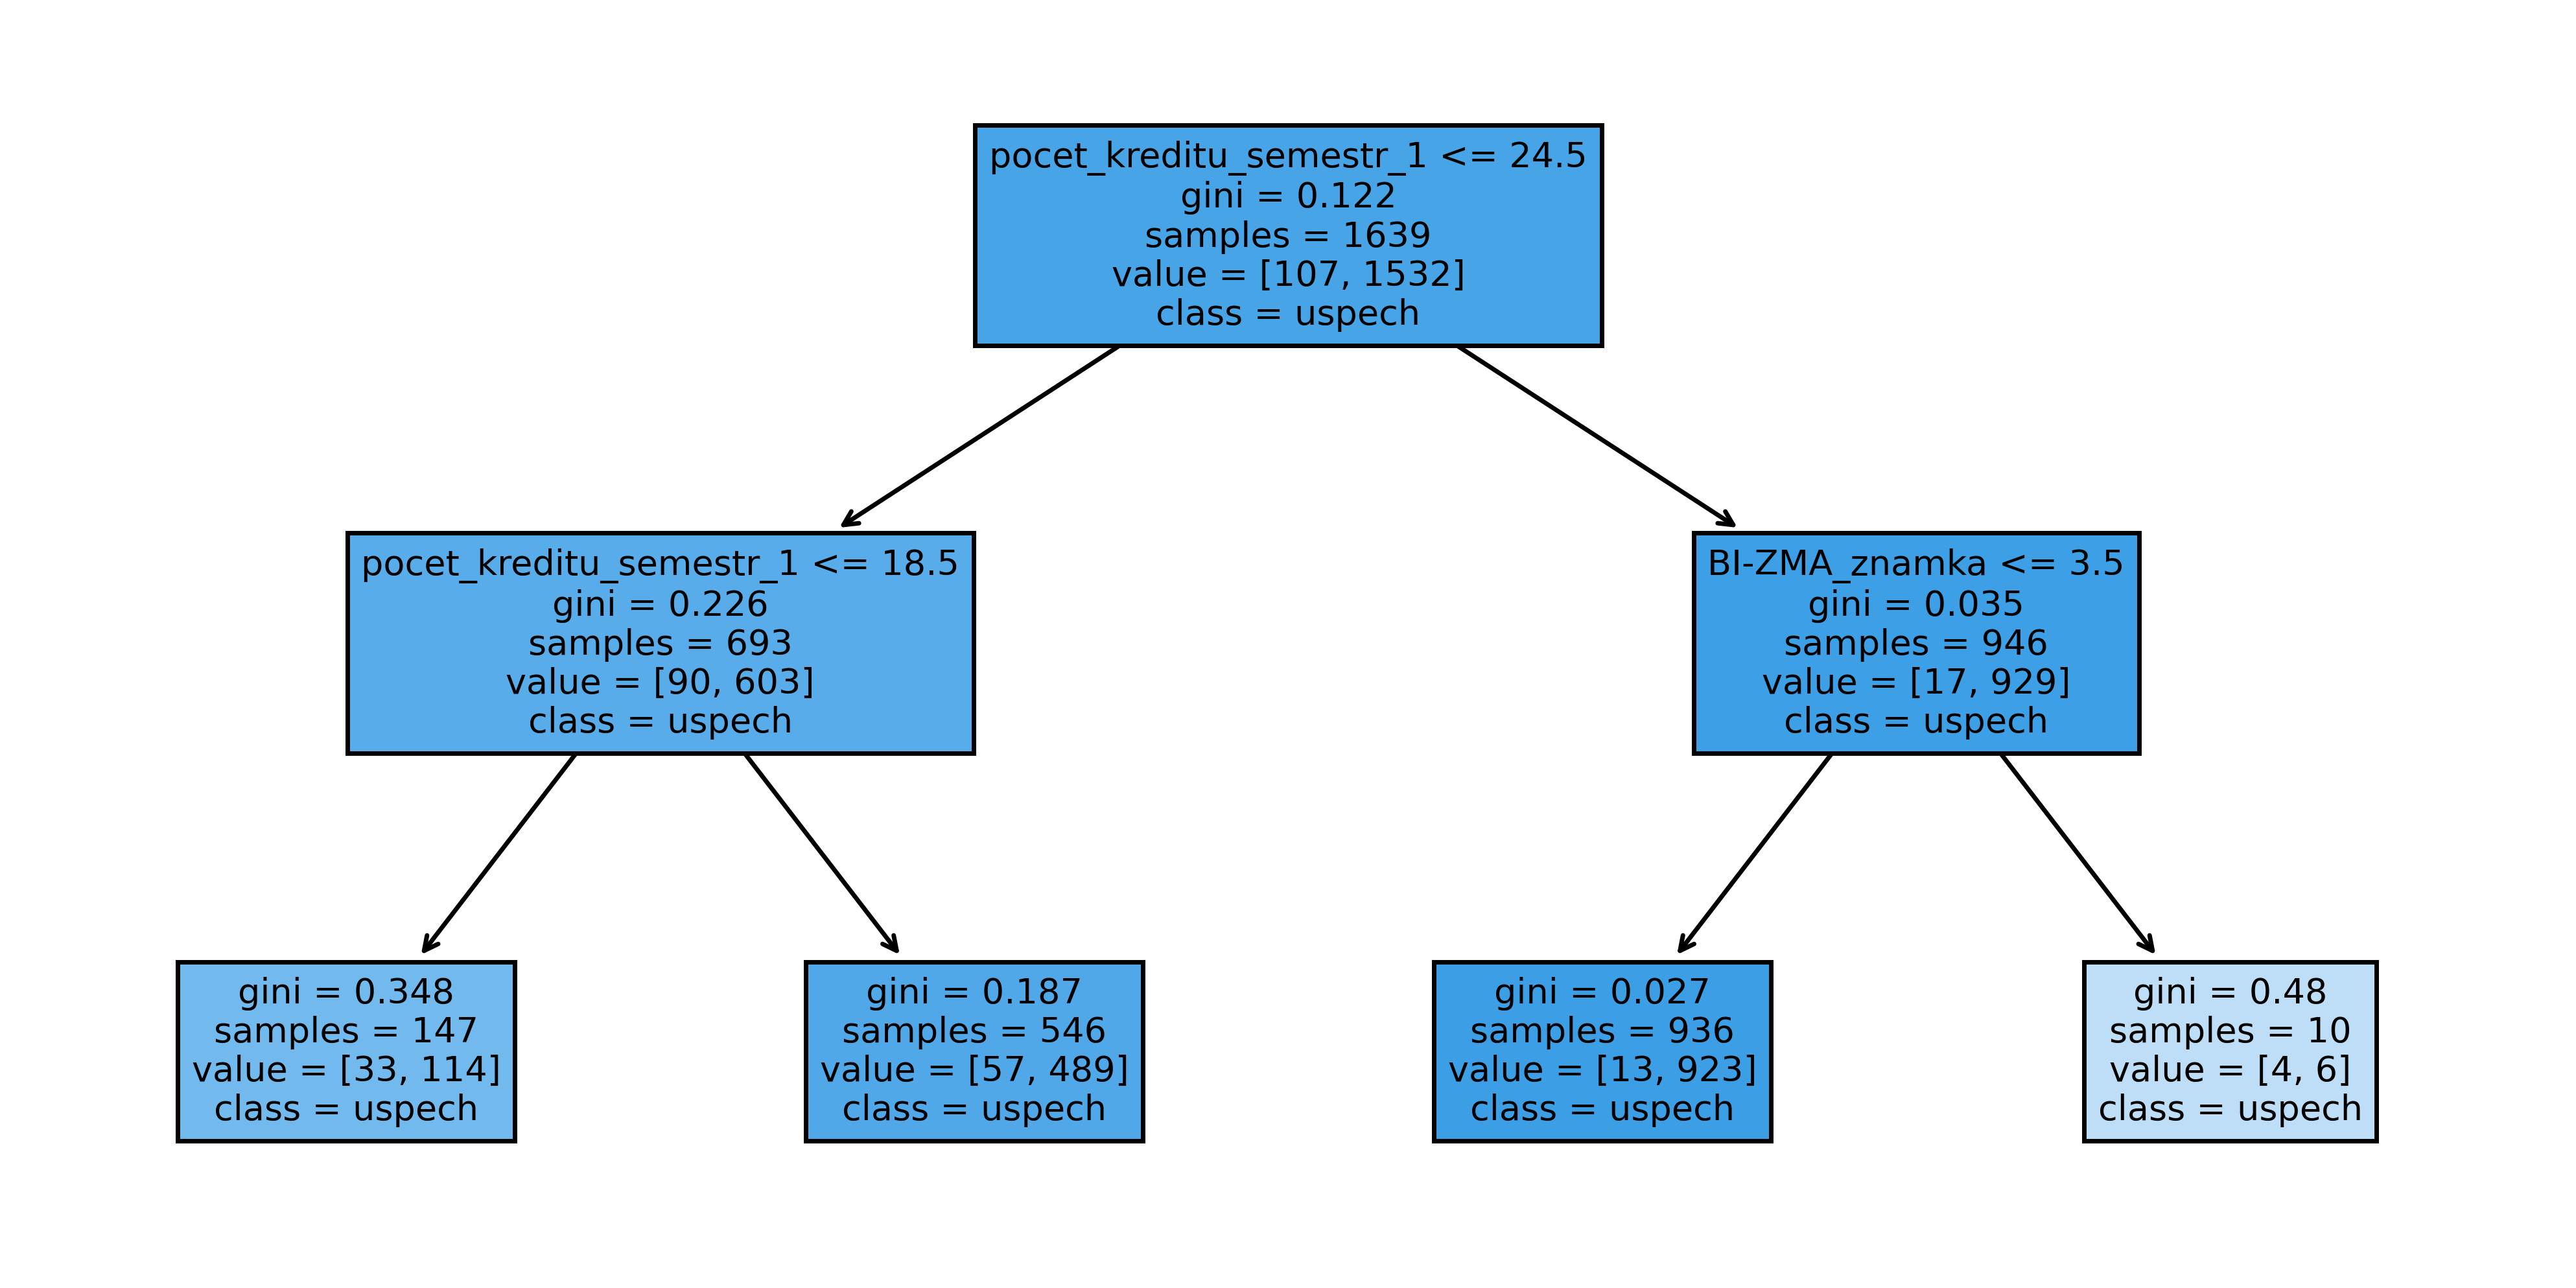

In [17]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,5), dpi=500)
tree.plot_tree(dt_f1.best_estimator_,
               feature_names = Xdata.columns, 
               class_names=['neuspech', 'uspech'],
               filled = True);

path_file = os.sep.join(['decision_trees', 'tree_f1_semestr3.png'])
fig.savefig(path_file)

#### Random forest

In [18]:
param_grid_rf = {
    'criterion':['gini','entropy'],
    'n_estimators': range(5, 50, 5),
    'max_depth': range(2, 4),
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf':[10]
}

In [19]:
rf_f1 = get_best_parameters(param_grid_rf, RandomForestClassifier)

Best hyper-parameters are: 
{'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 5}

0.966256 (+/-0.001564) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 5}
0.966256 (+/-0.001564) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 10}
0.966256 (+/-0.001564) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 15}
0.966256 (+/-0.001564) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 20}
0.966256 (+/-0.001564) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 25}
0.966256 (+/-0.001564) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 30}
0.966256 (+/-0.001564) for {'criterion': 'gini', 'max_depth': 2, 'max

In [20]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, rf_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, rf_f1.predict(Xtest))))

accuracy score (train): 0.934716
accuracy score (test): 0.934146


In [21]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':rf_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
12,pocet_kreditu_semestr_1,0.357835
10,BI-ZMA_znamka,0.270591
4,BI-CAO_znamka,0.076895
0,BI-PA1_znamka,0.068046
14,BI-PA2_poradi_zapisu,0.067419
17,BI-SAP_znamka,0.057450
21,pocet_kreditu_semestr_2,0.055517
16,BI-DBS_poradi_zapisu,0.019664
6,BI-PS1_znamka,0.017686
8,BI-MLO_znamka,0.008897


#### Adaboost

In [22]:
param_grid_ab = {
    'n_estimators': range(5, 50, 5),
    'learning_rate': np.arange(0.1, 1., 0.1)
}

In [23]:
ab_f1 = get_best_parameters(param_grid_ab, AdaBoostClassifier)

Best hyper-parameters are: 
{'learning_rate': 0.1, 'n_estimators': 5}

0.966256 (+/-0.001564) for {'learning_rate': 0.1, 'n_estimators': 5}
0.966256 (+/-0.001564) for {'learning_rate': 0.1, 'n_estimators': 10}
0.966256 (+/-0.001564) for {'learning_rate': 0.1, 'n_estimators': 15}
0.966256 (+/-0.001564) for {'learning_rate': 0.1, 'n_estimators': 20}
0.966256 (+/-0.001564) for {'learning_rate': 0.1, 'n_estimators': 25}
0.966256 (+/-0.001564) for {'learning_rate': 0.1, 'n_estimators': 30}
0.966256 (+/-0.001564) for {'learning_rate': 0.1, 'n_estimators': 35}
0.966256 (+/-0.001564) for {'learning_rate': 0.1, 'n_estimators': 40}
0.966256 (+/-0.001564) for {'learning_rate': 0.1, 'n_estimators': 45}
0.966256 (+/-0.001564) for {'learning_rate': 0.2, 'n_estimators': 5}
0.966256 (+/-0.001564) for {'learning_rate': 0.2, 'n_estimators': 10}
0.966256 (+/-0.001564) for {'learning_rate': 0.2, 'n_estimators': 15}
0.966256 (+/-0.001564) for {'learning_rate': 0.2, 'n_estimators': 20}
0.966256 (+/-0.001564

In [24]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, ab_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, ab_f1.predict(Xtest))))

accuracy score (train): 0.934716
accuracy score (test): 0.934146


In [25]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':ab_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
12,pocet_kreditu_semestr_1,0.8
21,pocet_kreditu_semestr_2,0.2
1,BI-PA1_poradi_zapisu,0.0
20,BI-LIN_poradi_zapisu,0.0
19,BI-LIN_znamka,0.0
18,BI-SAP_poradi_zapisu,0.0
17,BI-SAP_znamka,0.0
16,BI-DBS_poradi_zapisu,0.0
15,BI-DBS_znamka,0.0
14,BI-PA2_poradi_zapisu,0.0


#### Xgboost

In [26]:
param_grid = {
    'eta': np.arange(0.1, 1., 0.1),
    'max_depth': range(3, 8)
}
param_comb = ParameterGrid(param_grid)

In [27]:
xgb_f1 = get_best_parameters(param_grid, XGBClassifier, True)

Best hyper-parameters are: 
{'eta': 0.1, 'max_depth': 3}

0.963965 (+/-0.004790) for {'eta': 0.1, 'max_depth': 3}
0.962985 (+/-0.003285) for {'eta': 0.1, 'max_depth': 4}
0.962630 (+/-0.004450) for {'eta': 0.1, 'max_depth': 5}
0.962630 (+/-0.004450) for {'eta': 0.1, 'max_depth': 6}
0.961962 (+/-0.007525) for {'eta': 0.1, 'max_depth': 7}
0.962000 (+/-0.003513) for {'eta': 0.2, 'max_depth': 3}
0.960929 (+/-0.006168) for {'eta': 0.2, 'max_depth': 4}
0.958983 (+/-0.010147) for {'eta': 0.2, 'max_depth': 5}
0.958642 (+/-0.006601) for {'eta': 0.2, 'max_depth': 6}
0.958002 (+/-0.007721) for {'eta': 0.2, 'max_depth': 7}
0.958337 (+/-0.006421) for {'eta': 0.30000000000000004, 'max_depth': 3}
0.957664 (+/-0.008621) for {'eta': 0.30000000000000004, 'max_depth': 4}
0.956946 (+/-0.015079) for {'eta': 0.30000000000000004, 'max_depth': 5}
0.956997 (+/-0.010066) for {'eta': 0.30000000000000004, 'max_depth': 6}
0.955676 (+/-0.006851) for {'eta': 0.30000000000000004, 'max_depth': 7}
0.956666 (+/-0.011649)

In [28]:
print('accuracy score XGBoost (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, xgb_f1.predict(Xtrain))))
print('accuracy score XGBoost (val): {0:.6f}'.format(metrics.accuracy_score(ytest, xgb_f1.predict(Xtest))))

accuracy score XGBoost (train): 0.935326
accuracy score XGBoost (val): 0.929268


In [29]:
feat_imp = pd.Series(xgb_f1.best_estimator_.get_booster().get_fscore()).sort_values(ascending=False)

In [30]:
feat_imp

pocet_kreditu_semestr_2    88.0
pocet_kreditu_semestr_1    87.0
BI-PS1_znamka              57.0
BI-PA1_znamka              57.0
BI-SAP_znamka              53.0
BI-ZMA_znamka              49.0
BI-LIN_znamka              41.0
BI-DBS_znamka              35.0
BI-PA2_znamka              34.0
BI-MLO_znamka              32.0
BI-PAI_znamka              29.0
BI-CAO_znamka              16.0
BI-PS1_poradi_zapisu       15.0
BI-MLO_poradi_zapisu        2.0
dtype: float64

#### MLP

In [31]:
mlp = MLPClassifier(random_state=1, max_iter=500).fit(Xtrain, ytrain)

In [32]:
print('accuracy score mlp (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, mlp.predict(Xtrain))))
print('accuracy score mlp (val): {0:.6f}'.format(metrics.accuracy_score(ytest, mlp.predict(Xtest))))

accuracy score mlp (train): 0.940207
accuracy score mlp (val): 0.921951


#### Lineární regrese

In [33]:
reg = LinearRegression().fit(Xtrain, ytrain)

In [34]:
print('RMSE reg (test):', np.sqrt(mean_squared_error(reg.predict(Xtrain), np.array(ytrain))))
print('RMSE reg (test):', np.sqrt(mean_squared_error(reg.predict(Xtest), np.array(ytest))))

RMSE reg (test): 0.23476033392587892
RMSE reg (test): 0.24025895917505916


#### kNN

In [35]:
param_grid = {
    'n_neighbors' : range(1, 12), # Počet nejbližších sousedů
    'p': range(1, 3), # Stupeň Minkowského vzdálenosti
    'weights': ['uniform', 'distance'], # Aritmetický, nebo vážený průměr
}
param_comb = ParameterGrid(param_grid)

In [36]:
knn = get_best_parameters(param_grid, KNeighborsClassifier)

Best hyper-parameters are: 
{'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}

0.941656 (+/-0.008825) for {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
0.941656 (+/-0.008825) for {'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
0.940989 (+/-0.011317) for {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
0.940989 (+/-0.011317) for {'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
0.915919 (+/-0.013548) for {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
0.936337 (+/-0.007486) for {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
0.915418 (+/-0.014952) for {'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
0.939529 (+/-0.010458) for {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
0.956755 (+/-0.008918) for {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.957410 (+/-0.012629) for {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.956135 (+/-0.009607) for {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.955806 (+/-0.008632) for {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.9

In [37]:
print('accuracy score knn (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, knn.predict(Xtrain))))
print('accuracy score knn (val): {0:.6f}'.format(metrics.accuracy_score(ytest, knn.predict(Xtest))))

accuracy score knn (train): 0.934716
accuracy score knn (val): 0.934146


## Výsledky

In [38]:
results = pd.DataFrame(columns=['vysledky'], index=['dt', 'rf', 'ab', 'xgb', 'mlp', 'knn'])

### Měřeno accuracy_score

In [39]:
results.loc['dt', 'vysledky'] = round(metrics.accuracy_score(ytest, dt_f1.predict(Xtest)), 3)
results.loc['rf', 'vysledky'] = round(metrics.accuracy_score(ytest, rf_f1.predict(Xtest)), 3)
results.loc['ab', 'vysledky'] = round(metrics.accuracy_score(ytest, ab_f1.predict(Xtest)), 3)
results.loc['xgb', 'vysledky'] = round(metrics.accuracy_score(ytest, xgb_f1.predict(Xtest)), 3)
results.loc['mlp', 'vysledky'] = round(metrics.accuracy_score(ytest, mlp.predict(Xtest)), 3)
results.loc['knn', 'vysledky'] = round(metrics.accuracy_score(ytest, knn.predict(Xtest)), 3)

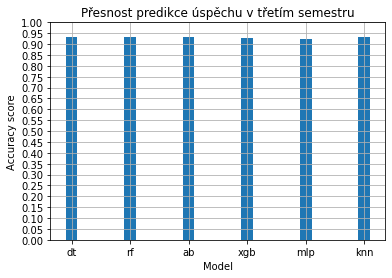

In [40]:
fig, ax = plt.subplots()
width = 0.2
ax.bar(results.index, results['vysledky'].values, width)

ax.set_ylabel('Accuracy score')
ax.set_xlabel('Model')
ax.set_title('Přesnost predikce úspěchu v třetím semestru')

ax.grid(True)
y_values = np.arange(0.0, 1.05, 0.05)
plt.ylim(ymin=0)
plt.ylim(ymax=1)
plt.yticks(y_values)
plt.show()

In [41]:
xgb_f1.predict(Xtest)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [42]:
results

,vysledky
dt,0.934
rf,0.934
ab,0.934
xgb,0.929
mlp,0.922
knn,0.934
